# Credit Card Fraud Dataset Visualizing and Analyzing

The primary objective of this project is to conduct a comprehensive visual analysis of fraud patterns within our dataset, which comprises 6,666 rows and 15 columns. We aim to uncover critical insights by identifying and visualizing the geographical distribution of fraudulent activities across different states and cities, as well as pinpointing the most fraud-prone categories.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
dataset=pd.read_csv('credit_card_fraud.csv')

In [3]:
#Checking whether the dataset has been properly imported or not
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,2019-01-22 00:37:57,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,1976-10-18,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
6662,2019-01-22 00:41:24,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",1956-09-01,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
6663,2019-01-22 00:42:49,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",1973-05-16,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
6664,2019-01-22 00:48:49,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


# Cleaning and preprocessing the Dataset

In [4]:
#Getting furthur information of the dataset using the pandas info function
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6666 entries, 0 to 6665
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  6666 non-null   object 
 1   merchant               6666 non-null   object 
 2   category               6666 non-null   object 
 3   amt                    6666 non-null   float64
 4   city                   6666 non-null   object 
 5   state                  6666 non-null   object 
 6   lat                    6666 non-null   float64
 7   long                   6666 non-null   float64
 8   city_pop               6666 non-null   int64  
 9   job                    6666 non-null   object 
 10  dob                    6666 non-null   object 
 11  trans_num              6666 non-null   object 
 12  merch_lat              6666 non-null   float64
 13  merch_long             6666 non-null   float64
 14  is_fraud               6666 non-null   int64  
dtypes: f

In [5]:
#Let's check if there is any missing value in the dataset
dataset.isnull().sum()

trans_date_trans_time    0
merchant                 0
category                 0
amt                      0
city                     0
state                    0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

# Data Cleaning And Wrangling

In [6]:
dataset.describe()

,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,6666.000000,6666.000000,6666.000000,6.666000e+03,6666.000000,6666.000000,6666.000000
mean,72.151169,39.719401,-110.812883,1.074933e+05,39.718273,-110.822444,0.009451
std,125.781507,5.319824,13.035408,2.887422e+05,5.349734,13.047740,0.096763
min,1.010000,20.027100,-165.672300,4.600000e+01,19.040141,-166.629875,0.000000
25%,10.000000,36.670400,-120.093600,4.710000e+02,36.647607,-119.846388,0.000000
50%,47.040000,39.599400,-111.098500,1.645000e+03,39.538012,-111.013610,0.000000
75%,85.232500,41.696400,-101.136000,3.543900e+04,42.171323,-100.556067,0.000000
max,3178.510000,65.689900,-89.628700,2.383912e+06,66.659242,-88.927438,1.000000


# EDA Analysis

Text(0.5, 0.98, 'Visualizing the Describe Function')

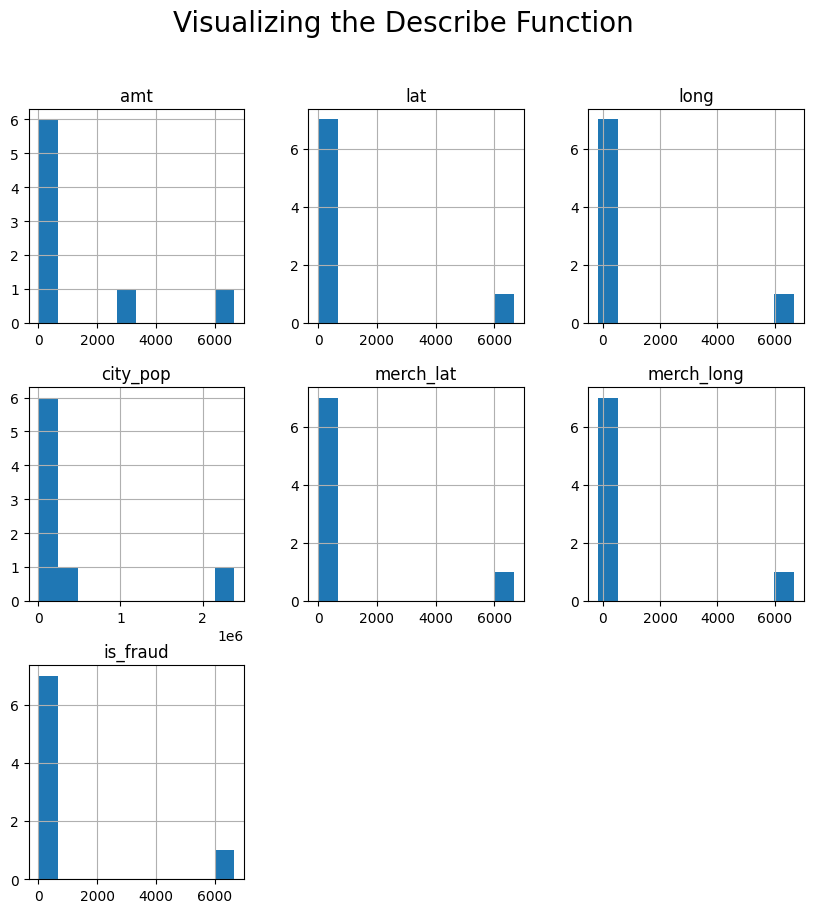

In [7]:
dataset.describe().hist(figsize=(10,10))
plt.suptitle('Visualizing the Describe Function',fontsize=20)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8492\1811615176.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')


Text(0.5, 0.98, 'Correlation of the Dataset')

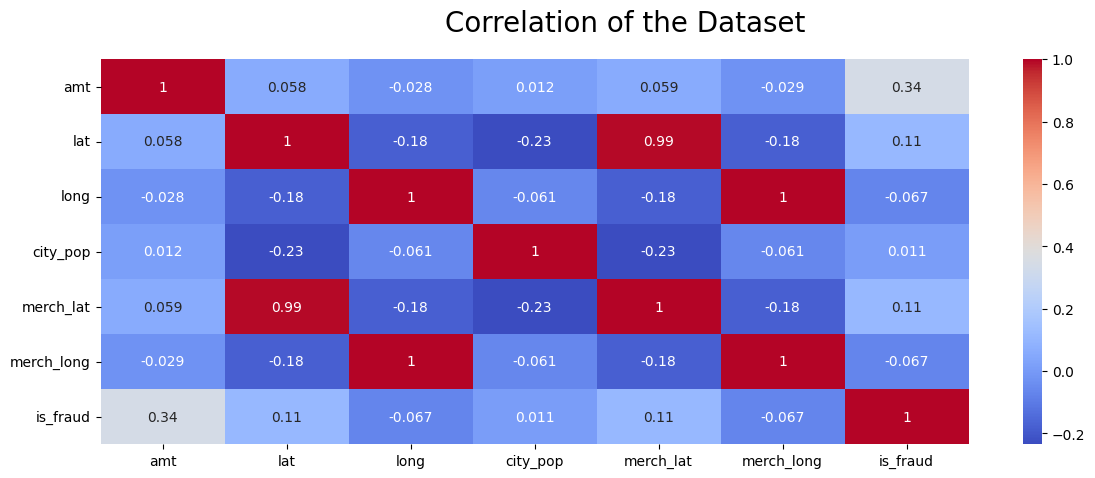

In [8]:
#Let's find the correlation of the dataset using the heatmap
plt.figure(figsize=(14,5))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the Dataset',fontsize=20)

In [9]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])
dataset['dob'] = pd.to_datetime(dataset['dob'])

In [10]:
dataset['trans_year'] = dataset['trans_date_trans_time'].dt.year
dataset['trans_month'] = dataset['trans_date_trans_time'].dt.month
dataset['trans_day'] = dataset['trans_date_trans_time'].dt.day
dataset['trans_hour'] = dataset['trans_date_trans_time'].dt.hour
dataset['trans_weekday'] = dataset['trans_date_trans_time'].dt.weekday

In [11]:
#Value's available in the column.
dataset['trans_date_trans_time'].value_counts()

2019-01-01 17:33:41    2
2019-01-01 12:47:15    2
2019-01-01 23:42:49    2
2019-01-18 15:03:34    2
2019-01-02 23:19:24    2
                      ..
2019-01-07 21:40:31    1
2019-01-07 21:26:33    1
2019-01-07 21:21:33    1
2019-01-07 21:17:48    1
2019-01-22 00:55:15    1
Name: trans_date_trans_time, Length: 6653, dtype: int64

In [12]:
dataset['merchant'].value_counts()

Kutch-Wilderman                     26
"Reichert, Shanahan and Hayes"      24
Berge LLC                           23
Harber Inc                          23
Rau and Sons                        22
                                    ..
Kessler Group                        1
Kovacek Lt                           1
"Medhurst, Labadie and Gottlieb"     1
Leannon-Nikolaus                     1
Lemke and Sons                       1
Name: merchant, Length: 691, dtype: int64

In [13]:
dataset['category'].value_counts()

home              672
gas_transport     662
grocery_pos       646
shopping_pos      616
kids_pets         574
shopping_net      563
personal_care     475
entertainment     467
health_fitness    447
food_dining       427
misc_pos          384
misc_net          312
grocery_net       242
travel            179
Name: category, dtype: int64

Text(0.5, 0.98, 'Category in the Dataset')

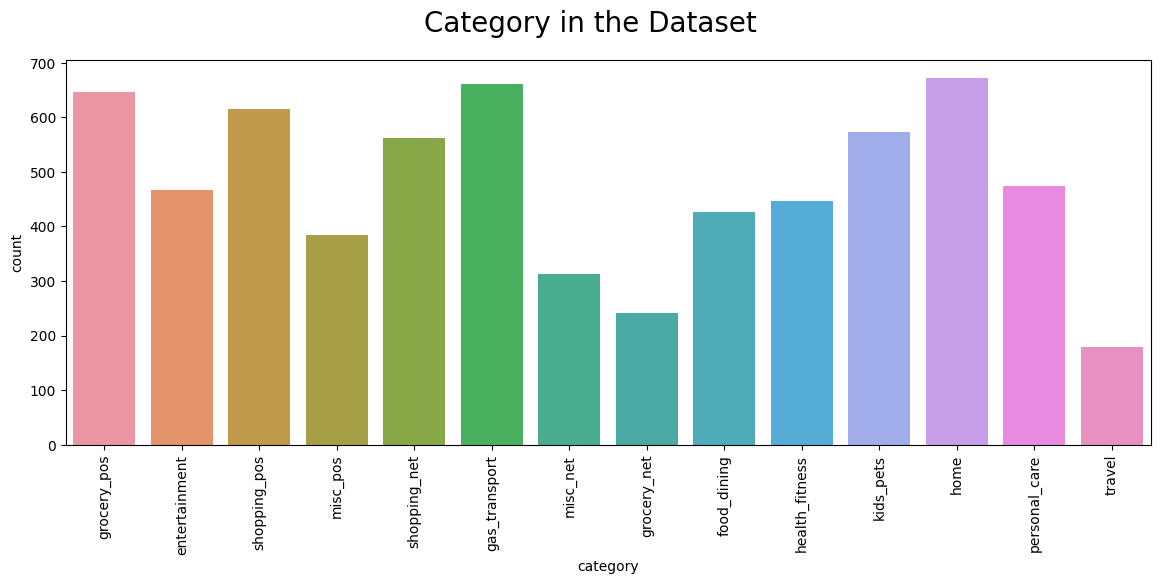

In [14]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='category')
plt.xticks(rotation=90)
plt.suptitle('Category in the Dataset',fontsize=20)

In [15]:
dataset['amt'].value_counts()

9.20      7
5.24      7
5.62      7
3.17      7
2.71      6
         ..
128.40    1
67.70     1
134.66    1
55.24     1
50.09     1
Name: amt, Length: 5036, dtype: int64

In [16]:
dataset['city'].value_counts()

Phoenix                      162
Orient                       102
Centerview                    99
Conway                        94
Littleton                     92
                            ... 
Aurora                         9
Bay City                       9
Parker Dam                     8
Yellowstone National Park      6
Los Angeles                    6
Name: city, Length: 162, dtype: int64

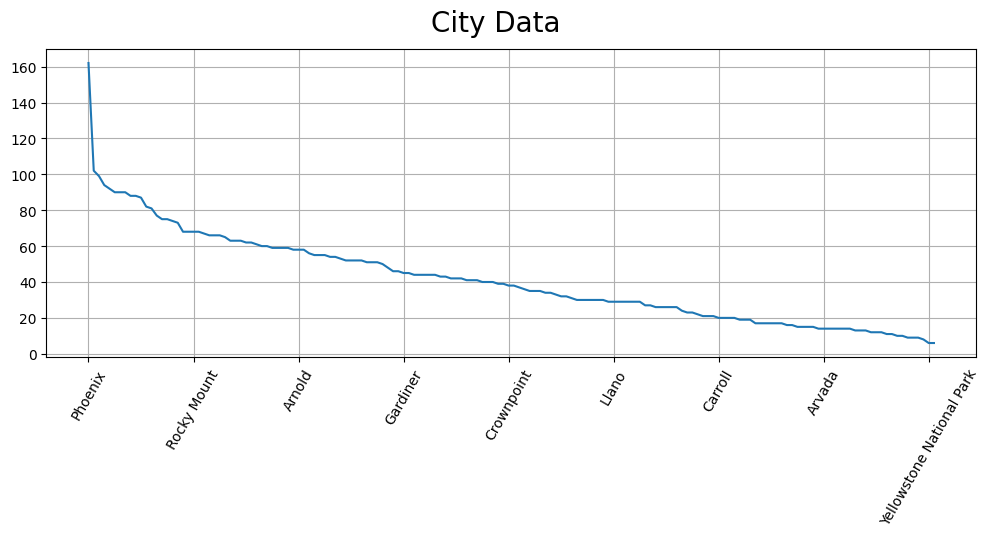

In [17]:
dataset['city'].value_counts().plot(kind='line',figsize=(12,4))
plt.xticks(rotation=60)
plt.suptitle('City Data',fontsize=20)
plt.grid()

In [18]:
dataset['state'].value_counts()

CA    1533
MO    1087
NE     658
WA     535
OR     515
WY     505
NM     501
CO     379
AZ     344
UT     275
ID     178
HI      81
AK      75
Name: state, dtype: int64

Text(0.5, 0.98, 'Visualizing the state data in the dataset')

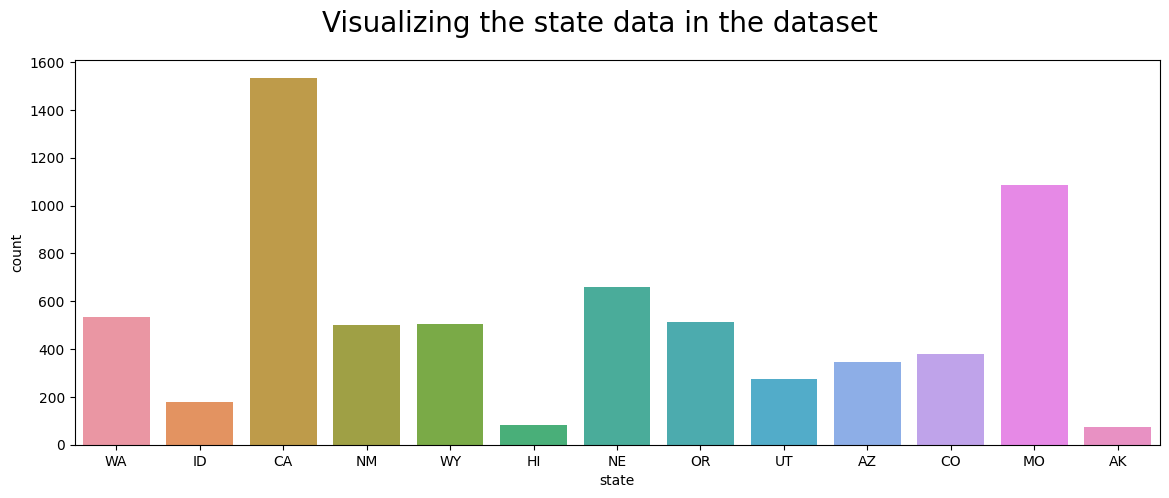

In [19]:
plt.figure(figsize=(14,5))
sns.countplot(data=dataset,x='state')
plt.suptitle('Visualizing the state data in the dataset',fontsize=20)

In [20]:
dataset['job'].value_counts()

"Surveyor, land/geomatics"           134
"Surveyor, minerals"                 117
Contractor                           111
Special educational needs teacher    102
Land/geomatics surveyor              102
                                    ... 
Soil scientist                        10
"Scientist, marine"                    9
"Teacher, early years/pre"             9
Marketing executive                    8
"Journalist, newspaper"                6
Name: job, Length: 149, dtype: int64

In [21]:
dataset['city_pop'].value_counts()

1312922    162
241        143
149        102
2368        99
85          94
          ... 
1530         9
4593         9
126          8
2383912      6
369          6
Name: city_pop, Length: 159, dtype: int64

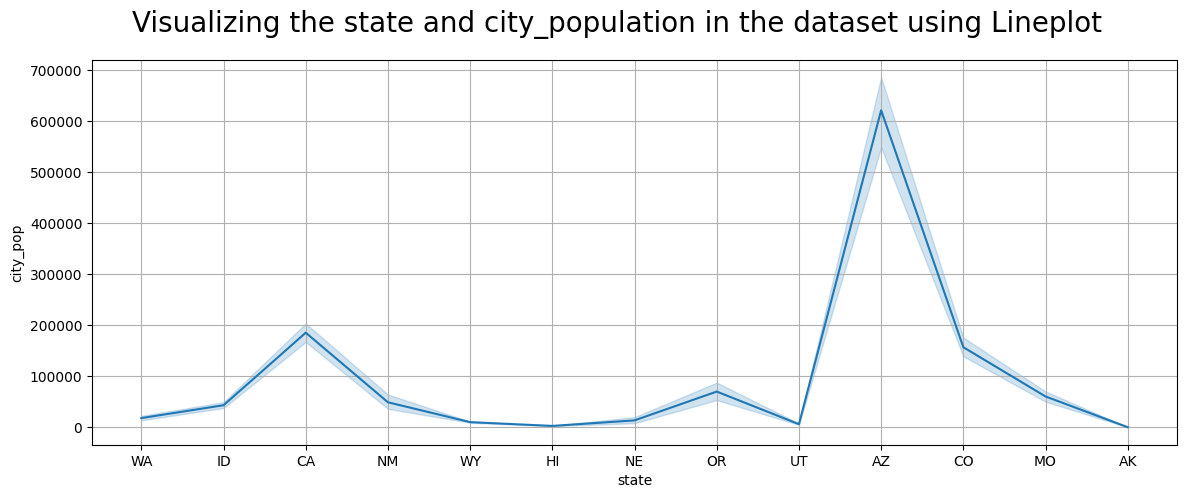

In [22]:
plt.figure(figsize=(14,5))
sns.lineplot(data=dataset,x='state',y='city_pop')
plt.suptitle('Visualizing the state and city_population in the dataset using Lineplot',fontsize=20)
plt.grid()

In [23]:
#Checking the values available in job column
dataset['job'].value_counts()

"Surveyor, land/geomatics"           134
"Surveyor, minerals"                 117
Contractor                           111
Special educational needs teacher    102
Land/geomatics surveyor              102
                                    ... 
Soil scientist                        10
"Scientist, marine"                    9
"Teacher, early years/pre"             9
Marketing executive                    8
"Journalist, newspaper"                6
Name: job, Length: 149, dtype: int64

In [24]:
dataset['is_fraud'].value_counts()

0    6603
1      63
Name: is_fraud, dtype: int64

Text(0.5, 0.98, 'Visualizing the is_fraud datatype in the dataset')

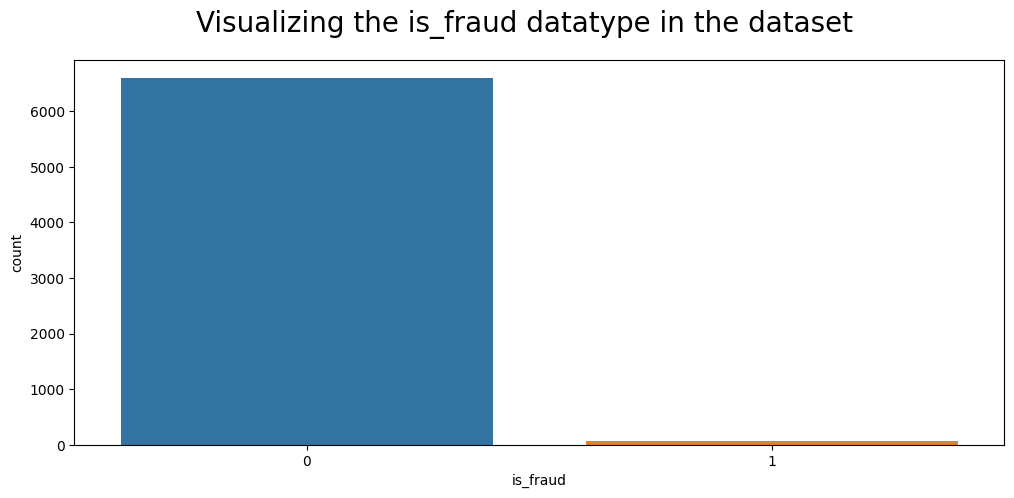

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(data=dataset,x='is_fraud')
plt.suptitle('Visualizing the is_fraud datatype in the dataset',fontsize=20)

# Analysis Part

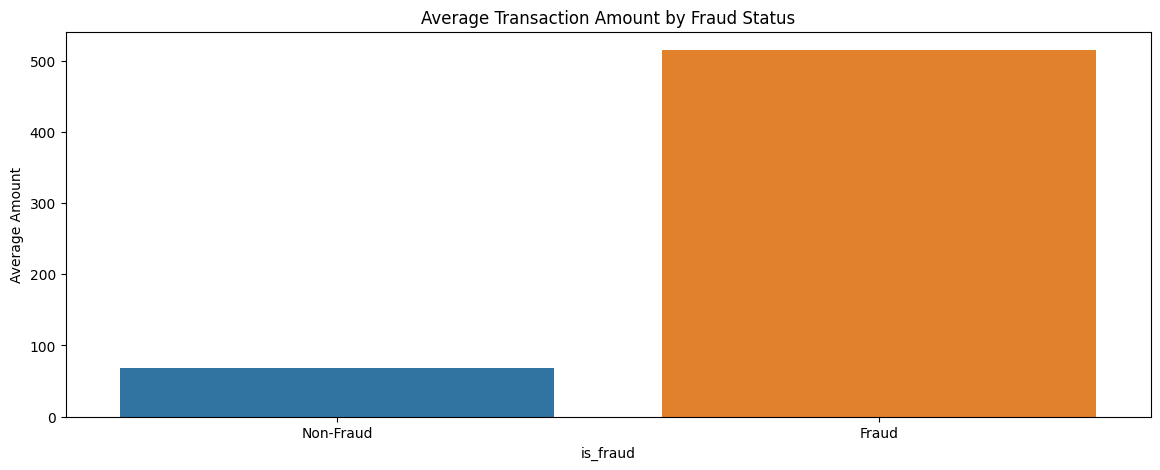

In [26]:
# Average Transaction Amount by Fraud Status
avg_amt_by_fraud = dataset.groupby('is_fraud')['amt'].mean().reset_index()
plt.figure(figsize=(14, 5))
sns.barplot(data=avg_amt_by_fraud, x='is_fraud', y='amt')
plt.title('Average Transaction Amount by Fraud Status')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.ylabel('Average Amount')
plt.show()

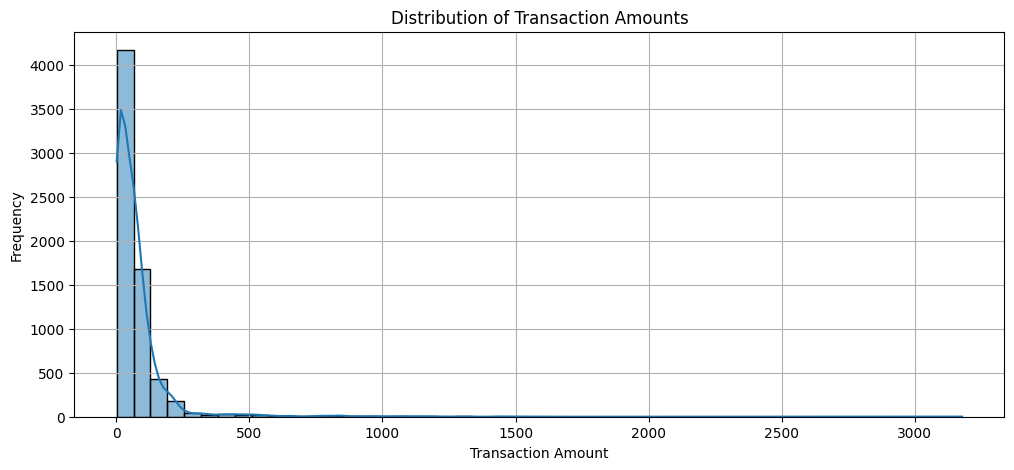

In [27]:
# Distribution of transaction amounts
plt.figure(figsize=(12,5))
sns.histplot(dataset['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.grid()

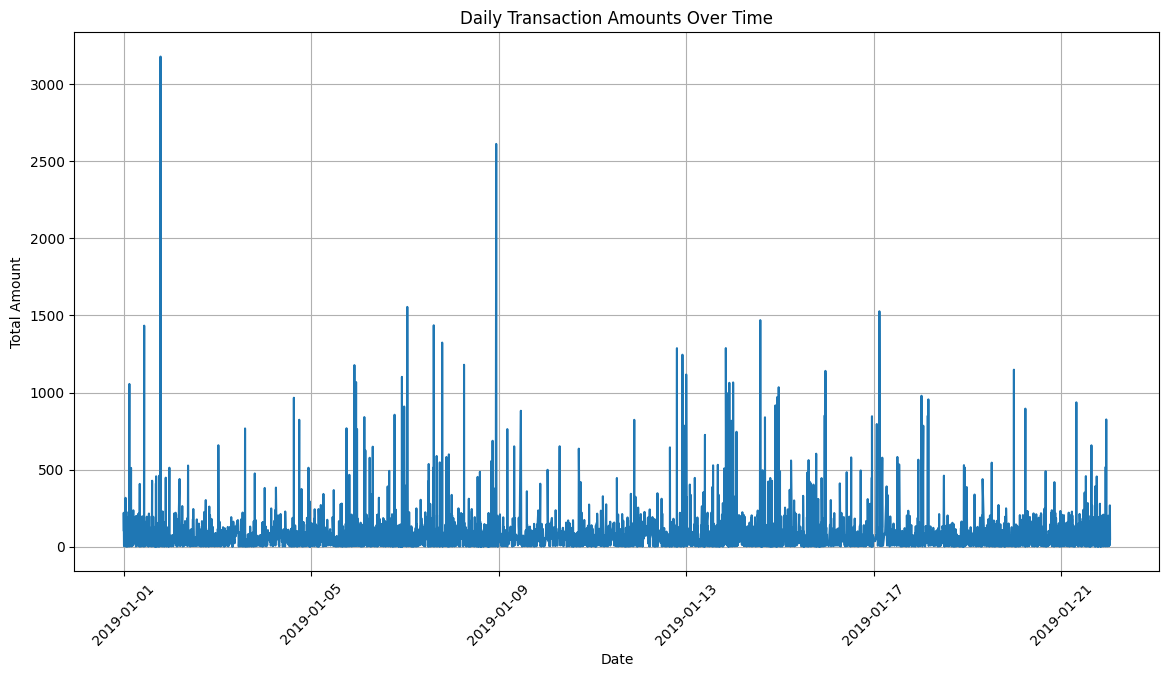

In [28]:
daily_revenue = dataset.groupby('trans_date_trans_time').agg({'amt': 'sum'}).reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_revenue, x='trans_date_trans_time', y='amt')
plt.title('Daily Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid()

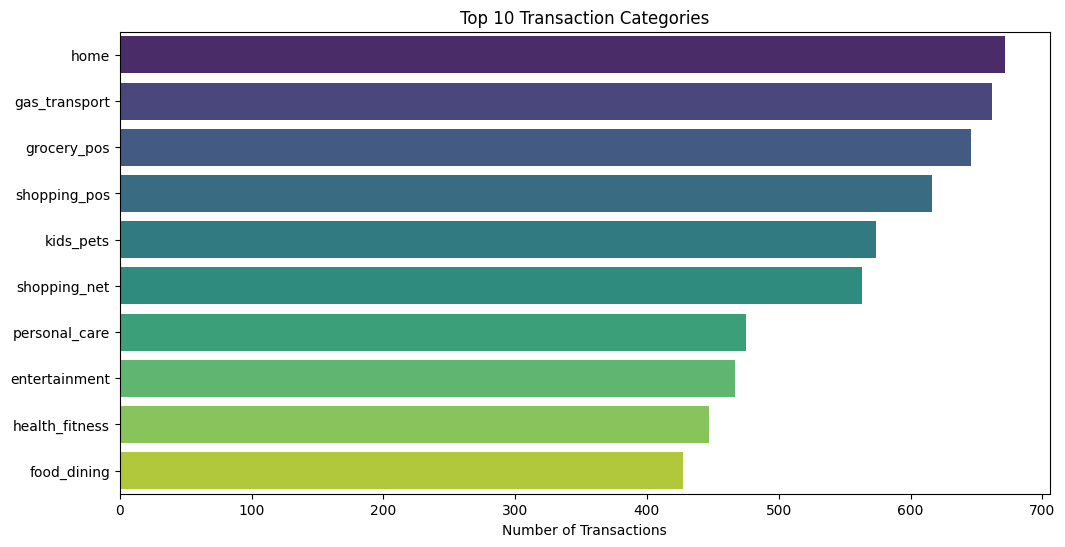

In [29]:
# Transactions by Category
category_counts = dataset['category'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette='viridis')
plt.title('Top 10 Transaction Categories')
plt.xlabel('Number of Transactions')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'grocery_pos'),
  Text(1, 0, 'entertainment'),
  Text(2, 0, 'shopping_pos'),
  Text(3, 0, 'misc_pos'),
  Text(4, 0, 'shopping_net'),
  Text(5, 0, 'gas_transport'),
  Text(6, 0, 'misc_net'),
  Text(7, 0, 'grocery_net'),
  Text(8, 0, 'food_dining'),
  Text(9, 0, 'health_fitness'),
  Text(10, 0, 'kids_pets'),
  Text(11, 0, 'home'),
  Text(12, 0, 'personal_care'),
  Text(13, 0, 'travel')])

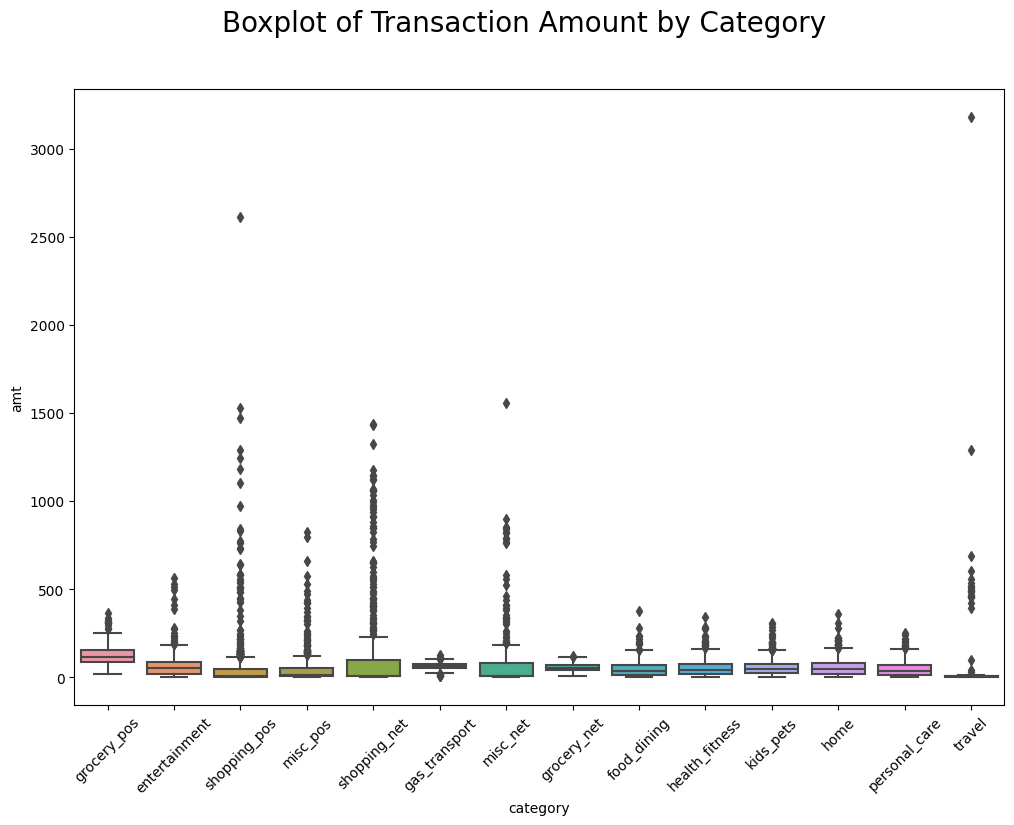

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='amt', data=dataset)
plt.suptitle('Boxplot of Transaction Amount by Category',fontsize=20)
plt.xticks(rotation=45)

Text(0.5, 0.98, 'Geographical Distribution of Transactions (Latitude vs Longitude)')

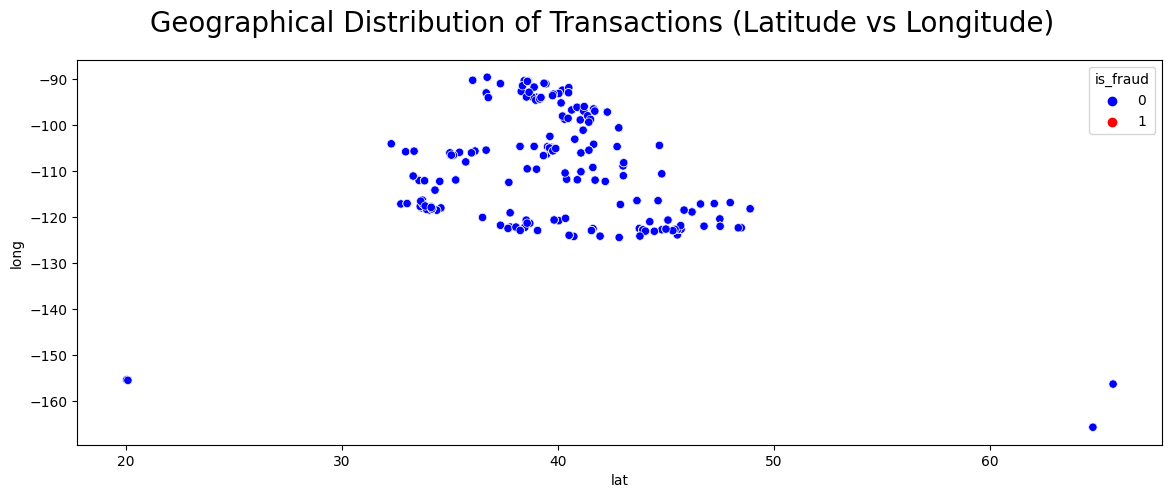

In [31]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='lat', y='long', hue='is_fraud', palette={0: 'blue', 1: 'red'}, data=dataset)
plt.suptitle('Geographical Distribution of Transactions (Latitude vs Longitude)',fontsize=20)

# Grouping & Aggregation

In [32]:
table_data=dataset[dataset['is_fraud']==1]
table_data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_weekday
945,2019-01-04 00:58:03,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1,2019,1,4,0,4
1077,2019-01-04 15:06:38,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1,2019,1,4,15,4
1184,2019-01-04 22:37:04,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1,2019,1,4,22,4
1192,2019-01-04 23:06:28,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1,2019,1,4,23,4
1202,2019-01-04 23:59:09,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-11-09,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1,2019,1,4,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,2019-01-18 14:38:27,Shanahan-Lehne,personal_care,21.54,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",1987-04-23,ce3b2734ce646ef6a47b3484a8e043e5,38.211376,-109.986757,1,2019,1,18,14,4
5592,2019-01-18 22:06:58,Beier LLC,entertainment,528.98,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",1987-04-23,3417f366e2e1d5dd25a3a89a3aae9f3d,39.164469,-109.933543,1,2019,1,18,22,4
5596,2019-01-18 22:12:40,Bartoletti and Sons,personal_care,21.23,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",1987-04-23,2df9fa2d0e508ed2a83aa3ac6f4b5d5a,38.998205,-110.005615,1,2019,1,18,22,4
5612,2019-01-18 23:16:21,Ankunding-Carroll,travel,9.33,Thompson,UT,38.9999,-109.6150,46,"""Surveyor, minerals""",1987-04-23,a0ed41246d201717db7250fa2375c73b,39.230640,-108.990363,1,2019,1,18,23,4


In [33]:
category_fraud_analyze=table_data.groupby('category')['amt'].sum().sort_values(ascending=False)
category_fraud_analyze

category
shopping_net      15238.35
shopping_pos       5548.76
misc_net           4861.36
grocery_pos        3431.87
entertainment      1990.82
misc_pos            845.20
home                187.35
food_dining         121.62
gas_transport        76.29
grocery_net          72.01
personal_care        42.77
health_fitness       18.17
travel                9.33
kids_pets             4.58
Name: amt, dtype: float64

Text(0.5, 0.98, 'Category wise fraud.')

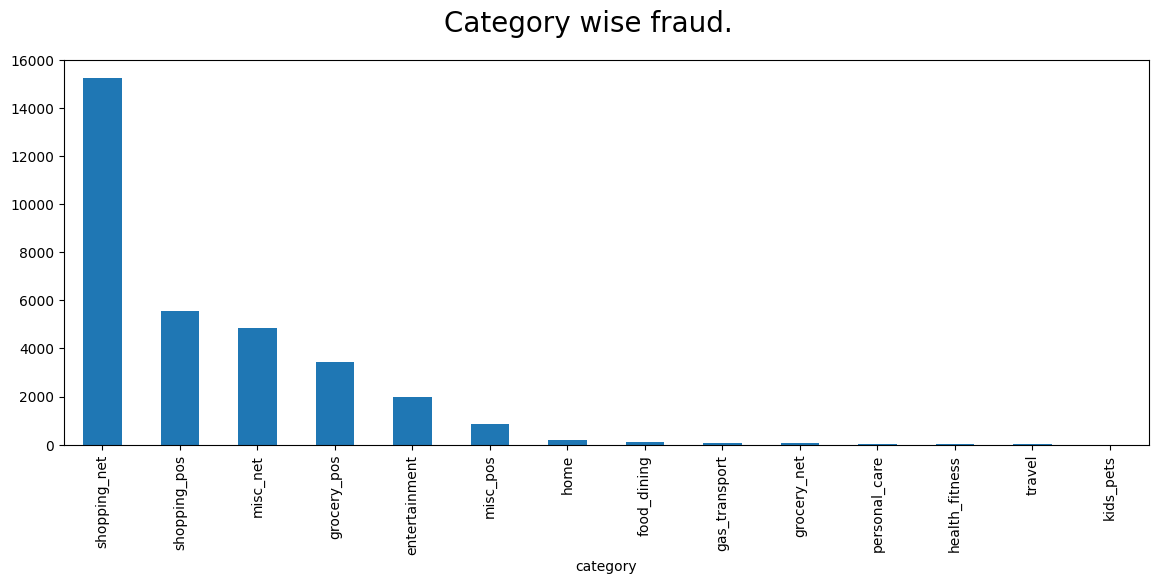

In [34]:
category_fraud_analyze.plot(kind='bar',figsize=(14,5))
plt.suptitle('Category wise fraud.',fontsize=20)

In [35]:
city_fraud_analyze=table_data.groupby('city')['amt'].sum().sort_values(ascending=False)
city_fraud_analyze

city
Ravenna        6896.52
Wales          6191.29
Westerville    5493.82
Thompson       5309.21
San Jose       4484.46
Browning       4073.18
Name: amt, dtype: float64

Text(0.5, 0.98, 'City wise fraud.')

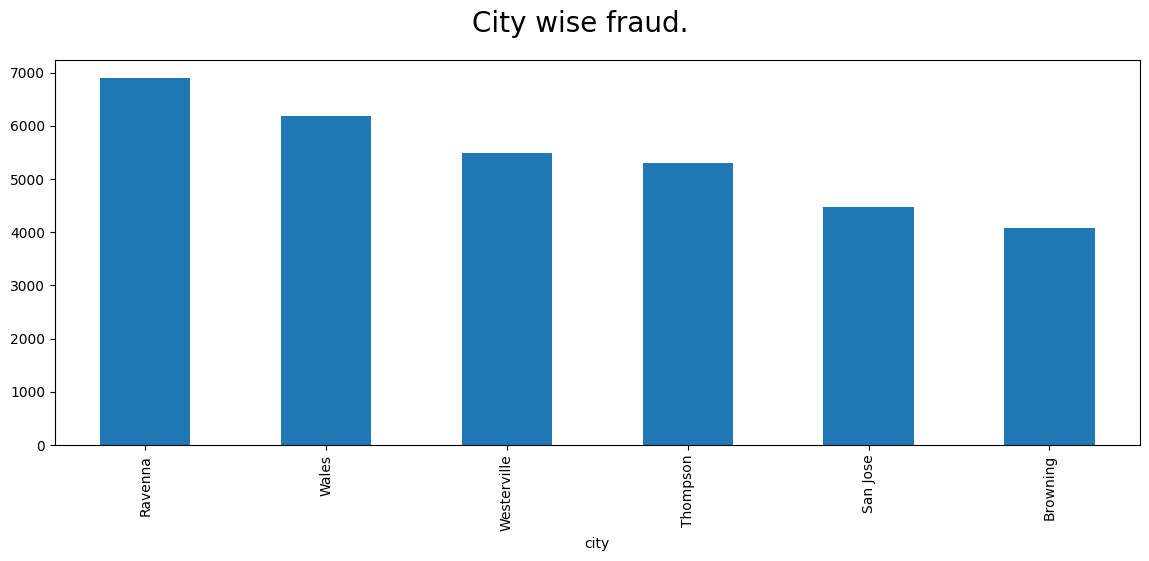

In [36]:
city_fraud_analyze.plot(kind='bar',figsize=(14,5))
plt.suptitle('City wise fraud.',fontsize=20)

In [37]:
state_fraud_analyze=table_data.groupby('state')['amt'].sum().sort_values(ascending=False)
state_fraud_analyze

state
NE    12390.34
AK     6191.29
UT     5309.21
CA     4484.46
MO     4073.18
Name: amt, dtype: float64

Text(0.5, 0.98, 'State wise fraud')

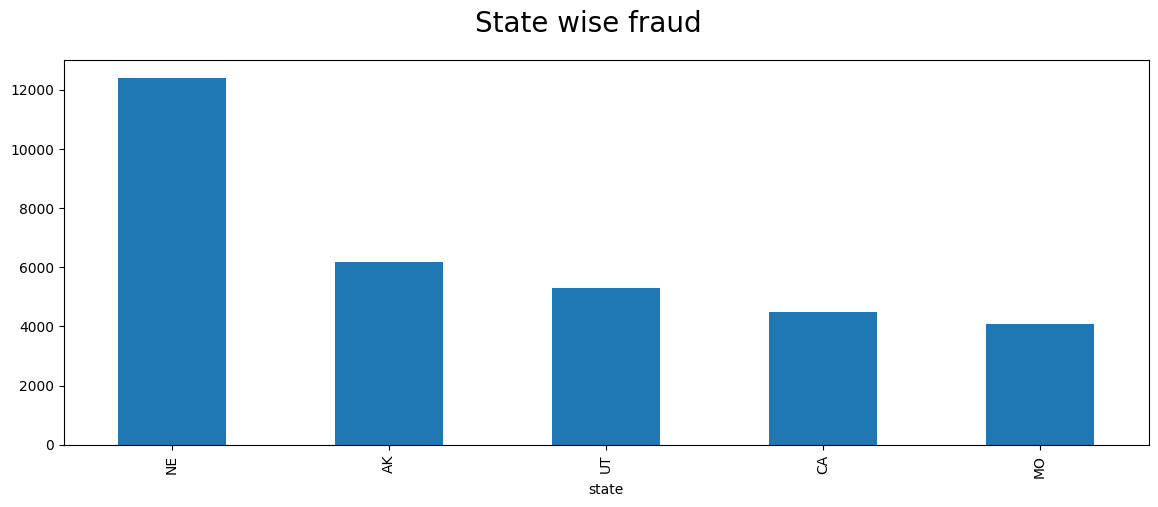

In [38]:
state_fraud_analyze.plot(kind='bar',figsize=(14,5))
plt.suptitle('State wise fraud',fontsize=20)

In [39]:
job_fraud_analyze=table_data.groupby('job')['amt'].sum().sort_values(ascending=False)
job_fraud_analyze

job
"Solicitor, Scotland"         6896.52
"Administrator, education"    6191.29
Product designer              5493.82
"Surveyor, minerals"          5309.21
Science writer                4484.46
Cytogeneticist                4073.18
Name: amt, dtype: float64

Text(0.5, 0.98, 'Job wise Fraud')

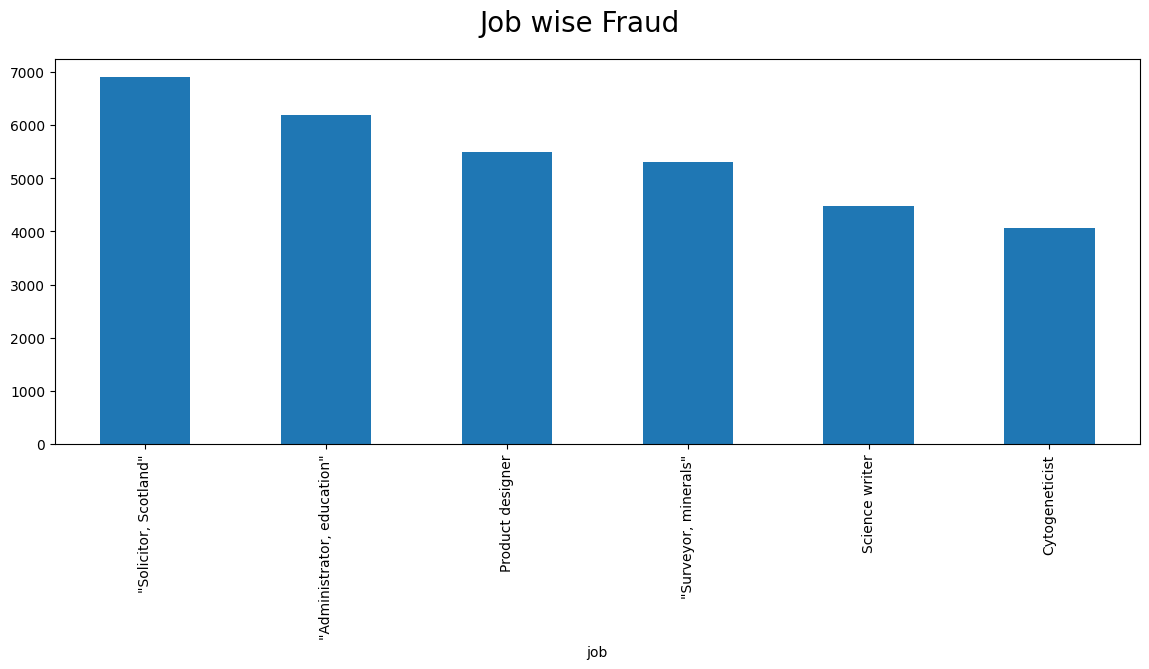

In [40]:
job_fraud_analyze.plot(kind='bar',figsize=(14,5))
plt.suptitle('Job wise Fraud',fontsize=20)

In [41]:
total_sum=table_data['amt'].sum()
print('The total amount of fraudlent is:',total_sum)

The total amount of fraudlent is: 32448.48


In [42]:
max_fraud_amt=table_data['amt'].max()
print('the maximum amount that has been fraudlent is:',max_fraud_amt)

the maximum amount that has been fraudlent is: 1177.79


# Feature Engineering.

In [43]:
dataset['amt_bin'] = pd.cut(dataset['amt'], bins=[0, 10, 50, 100, 500, 1000, 5000, 10000], 
                       labels=['0-10', '10-50', '50-100', '100-500', '500-1000', '1000-5000', '5000+'])

In [44]:
# Transaction density (e.g., number of transactions per capita)
dataset['trans_per_capita'] = dataset.groupby('city')['amt'].transform('count') / dataset['city_pop']

# Mean transaction amount by city
dataset['city_avg_amt'] = dataset.groupby('city')['amt'].transform('mean')

# Mean transaction amount by state
dataset['state_avg_amt'] = dataset.groupby('state')['amt'].transform('mean')

In [45]:
dataset

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,...,is_fraud,trans_year,trans_month,trans_day,trans_hour,trans_weekday,amt_bin,trans_per_capita,city_avg_amt,state_avg_amt
0,2019-01-01 00:00:44,"""Heller, Gutmann and Zieme""",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,...,0,2019,1,1,0,1,100-500,0.684564,58.671275,75.457009
1,2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,...,0,2019,1,1,0,1,100-500,0.003370,74.766429,76.971236
2,2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,...,0,2019,1,1,0,1,50-100,0.066214,61.723590,69.517286
3,2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,...,0,2019,1,1,0,1,0-10,0.061179,56.633455,54.991637
4,2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"""Education officer, museum""",...,0,2019,1,1,0,1,0-10,0.091295,54.594884,70.039109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6661,2019-01-22 00:37:57,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,...,0,2019,1,22,0,1,100-500,0.036866,105.289167,63.826505
6662,2019-01-22 00:41:24,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",...,0,2019,1,22,0,1,0-10,0.173077,55.354889,63.826505
6663,2019-01-22 00:42:49,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",...,0,2019,1,22,0,1,100-500,0.272727,103.288000,70.039109
6664,2019-01-22 00:48:49,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",...,0,2019,1,22,0,1,100-500,0.420690,203.022131,180.343467
